In [1]:
from google.colab import files
uploaded = files.upload()

Saving P1-AmazingMartEU2.xlsx to P1-AmazingMartEU2.xlsx


In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [132]:
OrdersList = pd.read_excel("/content/P1-AmazingMartEU2.xlsx",sheet_name="ListOfOrders")
OrderBreakDown = pd.read_excel("/content/P1-AmazingMartEU2.xlsx",sheet_name="OrderBreakdown")

df = pd.merge(OrdersList,OrderBreakDown,on="Order ID",how="inner")

In [133]:
df.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.50000,45,-26,3,Office Supplies,Paper
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,"Dania Corner Shelving, Traditional",0.00000,854,290,7,Furniture,Bookcases
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,"Binney & Smith Sketch Pad, Easy-Erase",0.00000,140,21,3,Office Supplies,Art
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Boston Markers, Easy-Erase",0.50000,27,-22,2,Office Supplies,Art
4,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Eldon Folders, Single Width",0.50000,17,-1,2,Office Supplies,Storage


In [134]:
df["TotalPrice"] = df["Sales"] * df["Quantity"]

In [135]:
# Check DataFrame
def check_df(dataframe, head=5):
    print("############################ SHAPE ###########################")
    print(dataframe.shape)
    print("########################### TYPES ############################")
    print(dataframe.dtypes)
    print("############################ HEAD ###########################")
    print(dataframe.head())
    print("############################ NULL ###########################")
    print(df.isna().sum())
    print("########################### DESCRİBE #########################")
    print(df.quantile([0, 0.05, 0.5, 0.95, 0.99, 1]).T)

check_df(df)

############################ SHAPE ###########################
(8047, 18)
########################### TYPES ############################
Order ID                 object
Order Date       datetime64[ns]
Customer Name            object
City                     object
Country                  object
Region                   object
Segment                  object
Ship Date        datetime64[ns]
Ship Mode                object
State                    object
Product Name             object
Discount                float64
Sales                     int64
Profit                    int64
Quantity                  int64
Category                 object
Sub-Category             object
TotalPrice                int64
dtype: object
############################ HEAD ###########################
          Order ID Order Date     Customer Name        City         Country   Region      Segment  Ship Date     Ship Mode                 State                           Product Name  Discount  Sales  Profit  Q

In [136]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
      It gives the names of categorical, numerical and categorical but cardinal variables in the data set.

      :param dataframe: dataframe
          This is the dataframe from which variable names are desired.
      :param cat_th: int, float
          class value for numeric but categorical variables
      :param car_th: int, float
          class value for categorical but cardinal variables
      :return :
      """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    return cat_cols, cat_but_car, num_cols

cat_cols, cat_but_car, num_cols = grab_col_names(df)

Observations: 8047
Variables: 18
cat_cols: 6
num_cols: 7
cat_but_car: 5
num_but_cat: 0


In [137]:
num_cols = [col for col in num_cols if col not in ["Order Date", "Ship Date"]]
df[num_cols].head()

,Discount,Sales,Profit,Quantity,TotalPrice
0,0.50000,45,-26,3,135
1,0.00000,854,290,7,5978
2,0.00000,140,21,3,420
3,0.50000,27,-22,2,54
4,0.50000,17,-1,2,34


In [138]:
# (Analysis of Categorical Variables)

def cat_summary(dataframe, col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.xticks(rotation=90)
    plt.show()

                Country    Ratio
France             1916 23.81012
Germany            1640 20.38027
United Kingdom     1314 16.32907
Italy               979 12.16602
Spain               761  9.45694
Netherlands         393  4.88381
Austria             264  3.28073
Sweden              203  2.52268
Belgium             135  1.67764
Ireland             100  1.24270
Switzerland          78  0.96931
Norway               70  0.86989
Portugal             70  0.86989
Finland              64  0.79533
Denmark              60  0.74562


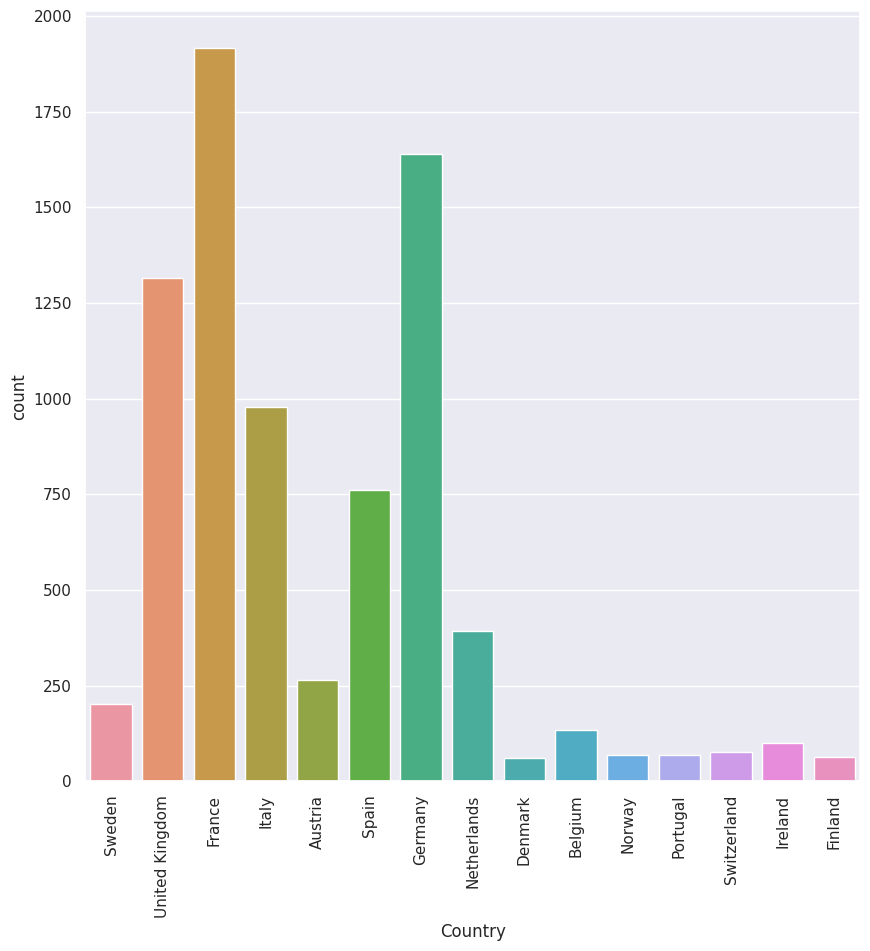

         Region    Ratio
Central    4426 55.00186
North      1811 22.50528
South      1810 22.49285


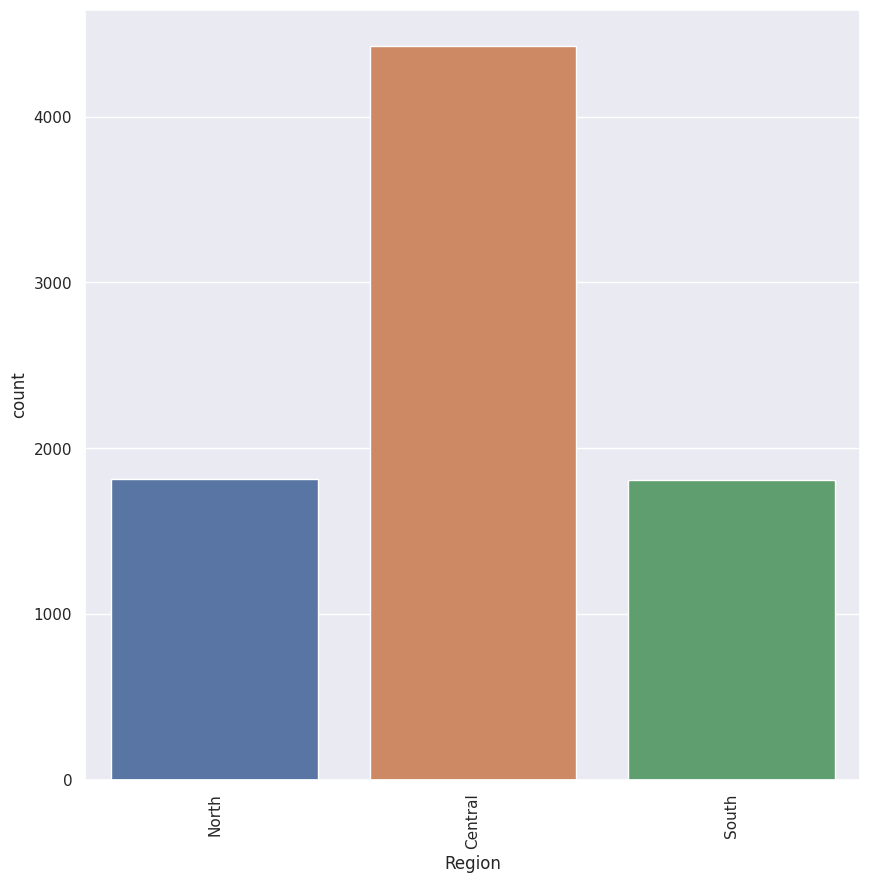

             Segment    Ratio
Consumer        4174 51.87026
Corporate       2514 31.24146
Home Office     1359 16.88828


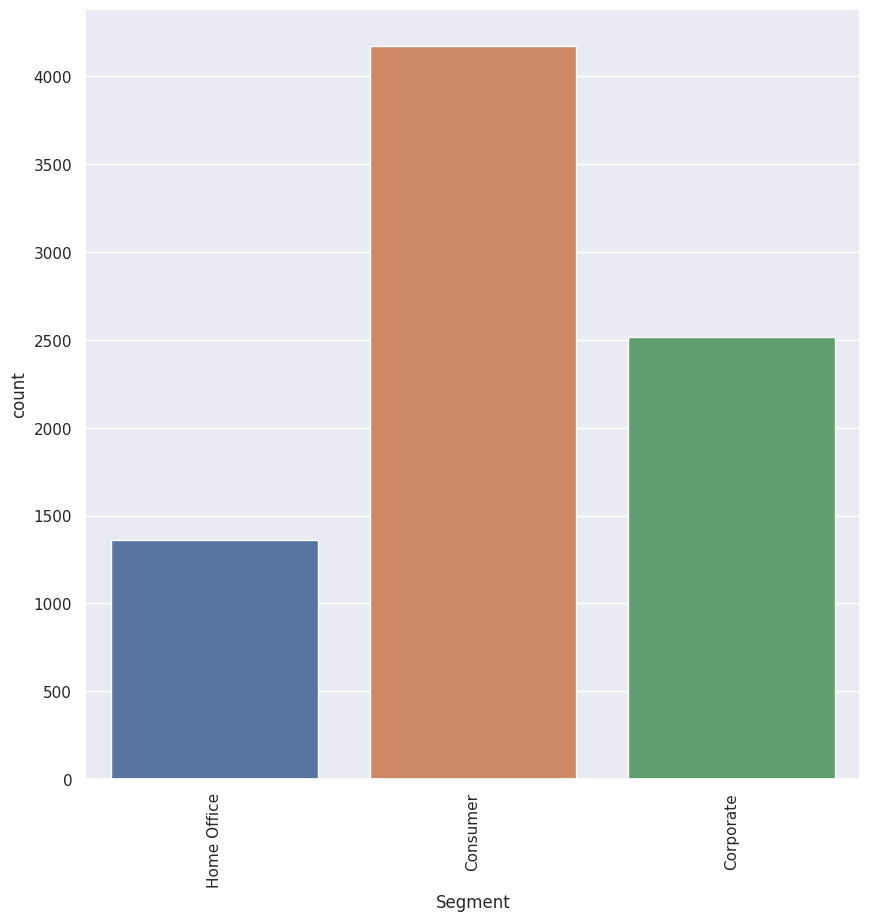

              Ship Mode    Ratio
Economy            4862 60.42003
Economy Plus       1590 19.75892
Priority           1169 14.52715
Immediate           426  5.29390


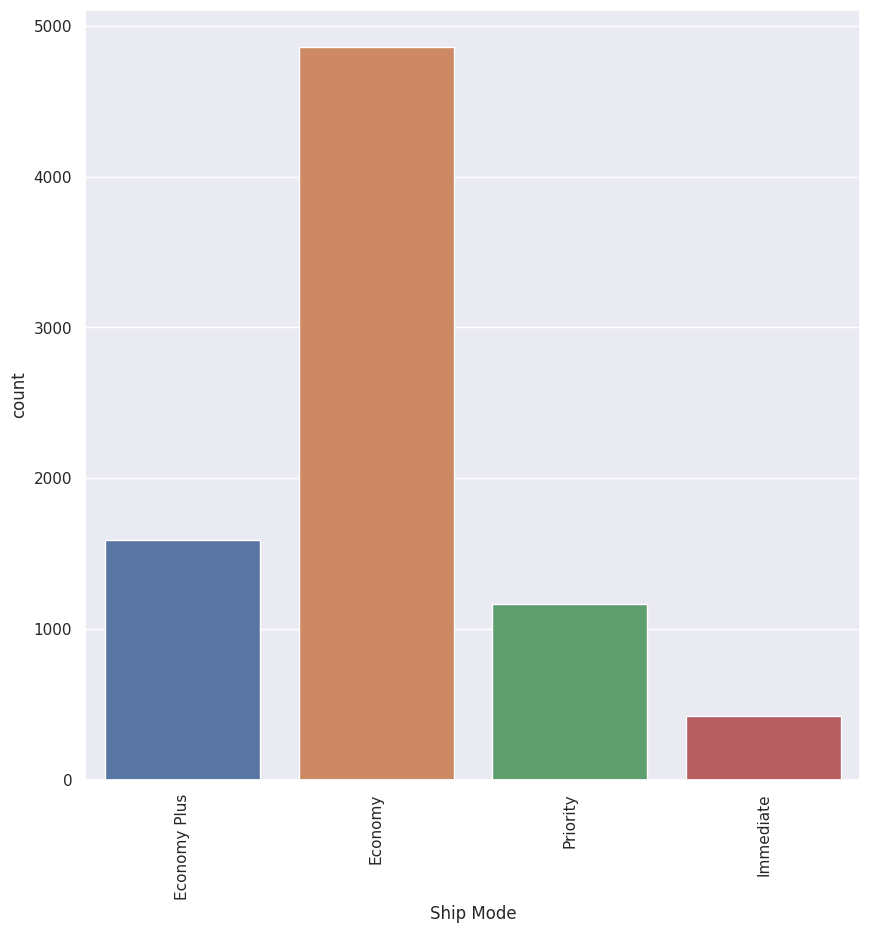

                 Category    Ratio
Office Supplies      5286 65.68908
Technology           1523 18.92631
Furniture            1238 15.38462


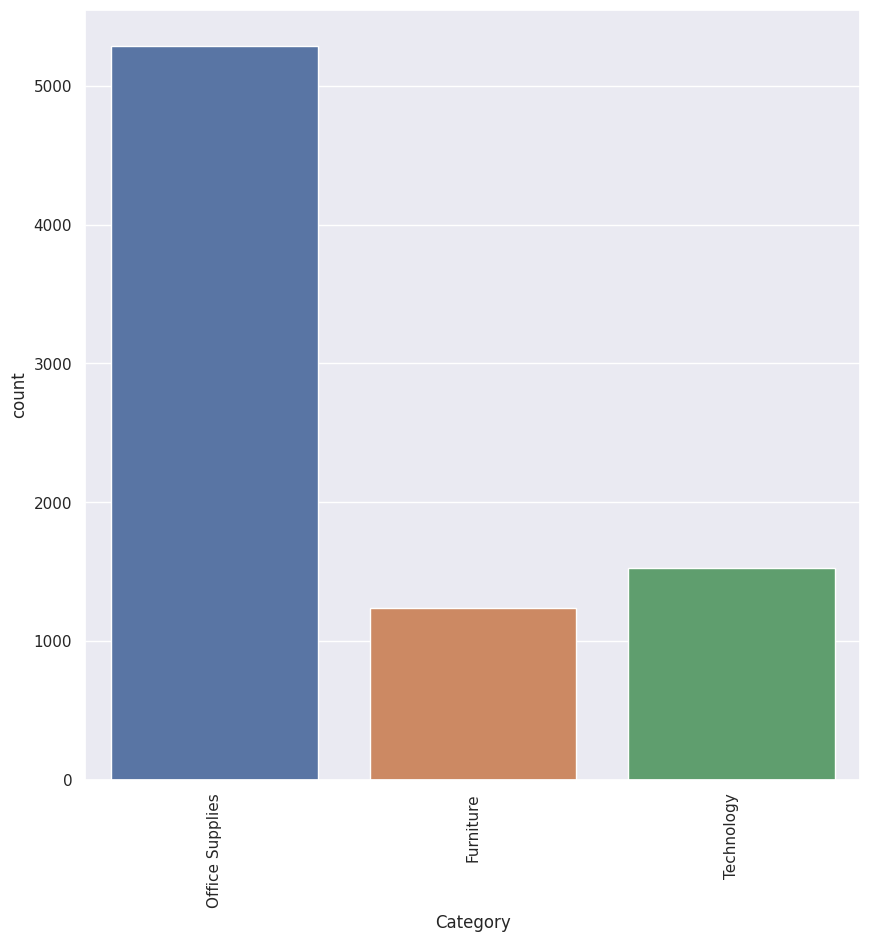

             Sub-Category    Ratio
Art                  1152 14.31589
Binders              1059 13.16018
Storage              1051 13.06077
Phones                453  5.62943
Bookcases             391  4.85895
Furnishings           389  4.83410
Chairs                383  4.75954
Paper                 374  4.64769
Labels                372  4.62284
Accessories           368  4.57313
Copiers               367  4.56071
Fasteners             350  4.34945
Supplies              347  4.31217
Envelopes             346  4.29974
Machines              335  4.16304
Appliances            235  2.92034
Tables                 75  0.93202


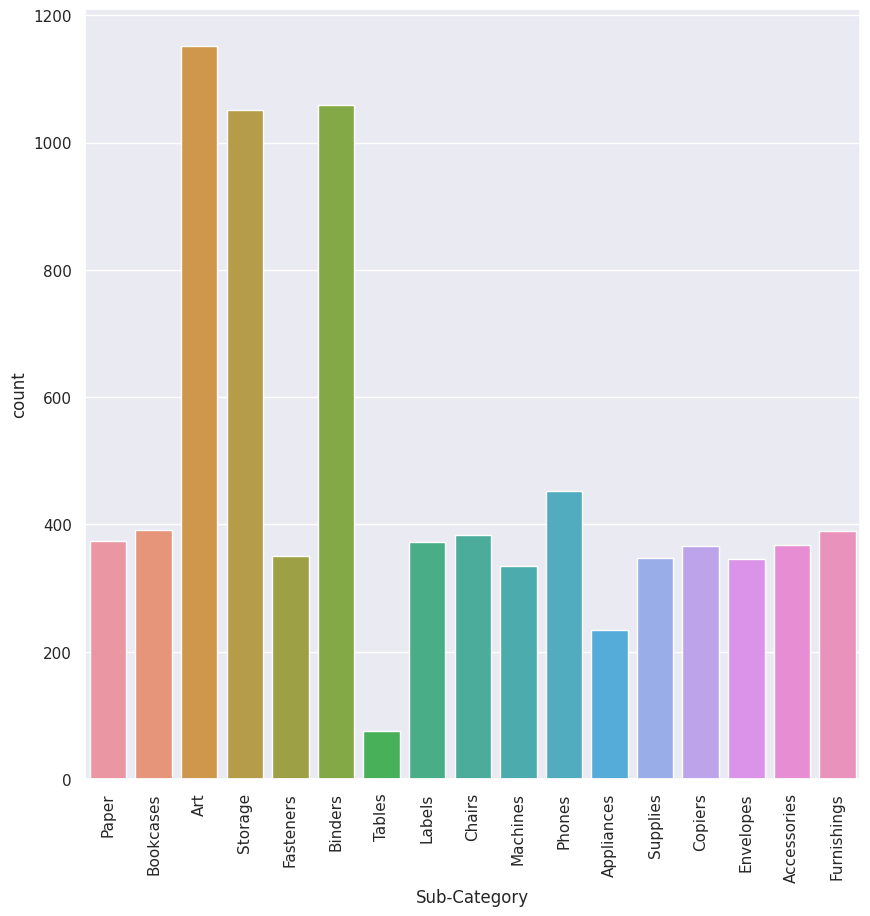

In [139]:
for col in cat_cols:
  cat_summary(df,col,plot=True)

In [140]:
# Analysis of Numerical Variables


def num_summary(dataframe, col_names, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[col_names].describe(quantiles).T)

  if plot:
    dataframe[col_names].hist(bins=50)
    plt.xlabel(col_names)
    plt.title(col_names)
    plt.show()

    print("#####################################")


In [141]:
num_cols

['Discount', 'Sales', 'Profit', 'Quantity', 'TotalPrice']

count   8047.00000
mean       0.11005
std        0.18177
min        0.00000
5%         0.00000
10%        0.00000
20%        0.00000
30%        0.00000
40%        0.00000
50%        0.00000
60%        0.00000
70%        0.10000
80%        0.15000
90%        0.50000
95%        0.50000
99%        0.60000
max        0.85000
Name: Discount, dtype: float64


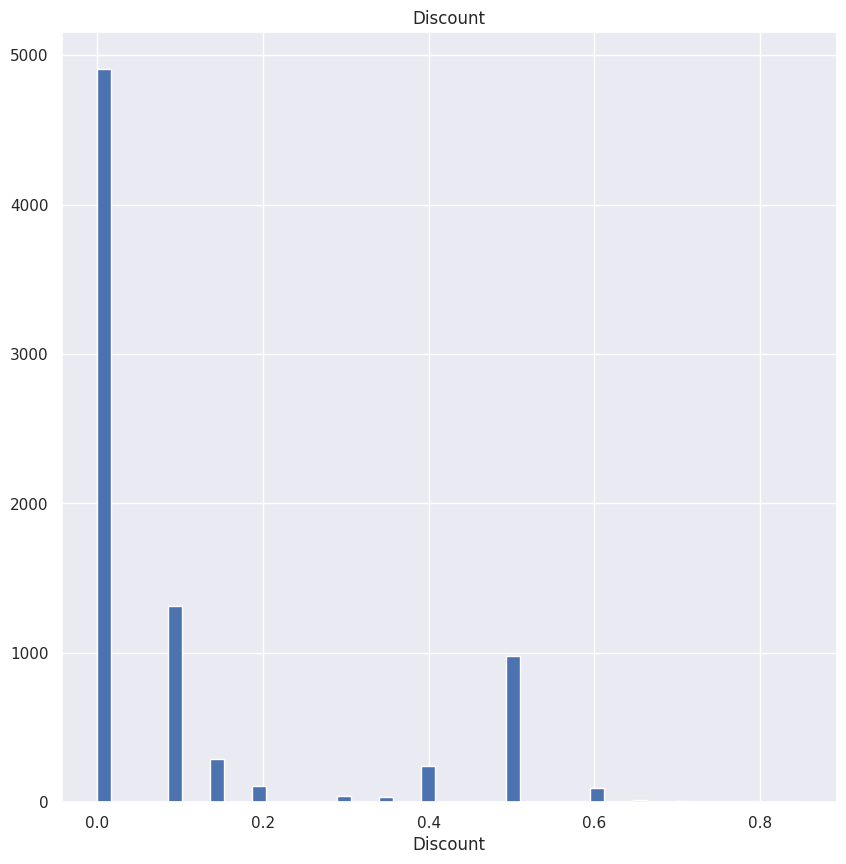

#####################################
count   8047.00000
mean     291.84566
std      485.21216
min        3.00000
5%        17.00000
10%       25.00000
20%       41.00000
30%       57.00000
40%       85.00000
50%      117.00000
60%      166.00000
70%      249.00000
80%      397.00000
90%      742.00000
95%     1200.00000
99%     2456.54000
max     6517.00000
Name: Sales, dtype: float64


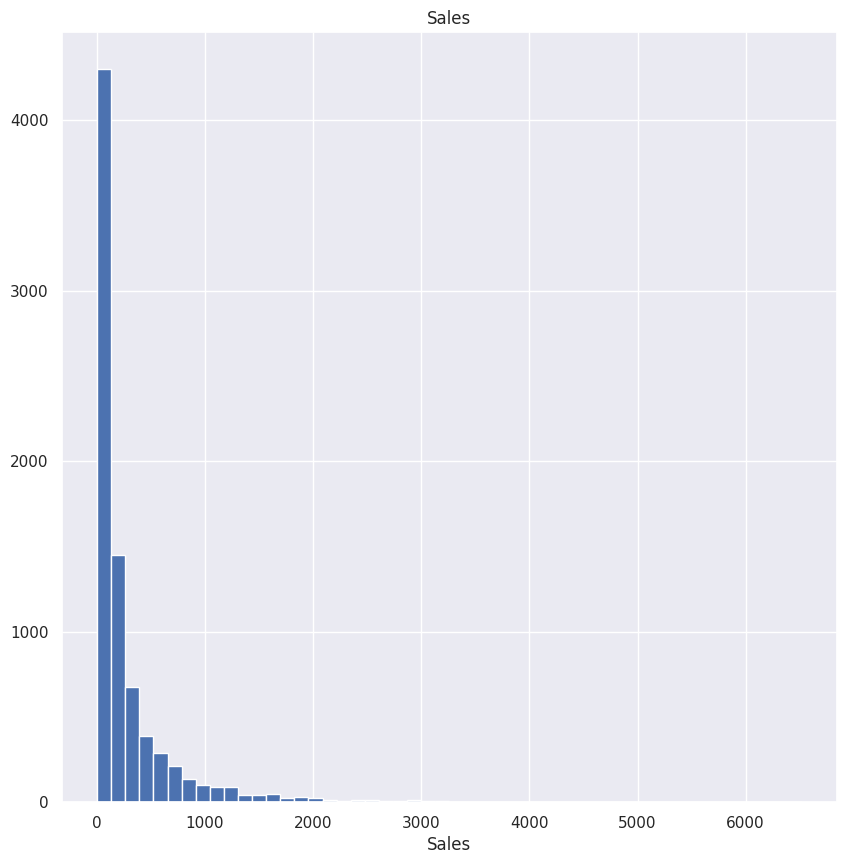

#####################################
count    8047.00000
mean       35.19821
std       178.12584
min     -3060.00000
5%        -93.00000
10%       -34.40000
20%        -3.00000
30%         3.00000
40%         8.00000
50%        14.00000
60%        23.00000
70%        36.00000
80%        64.00000
90%       135.00000
95%       241.00000
99%       701.00000
max      2476.00000
Name: Profit, dtype: float64


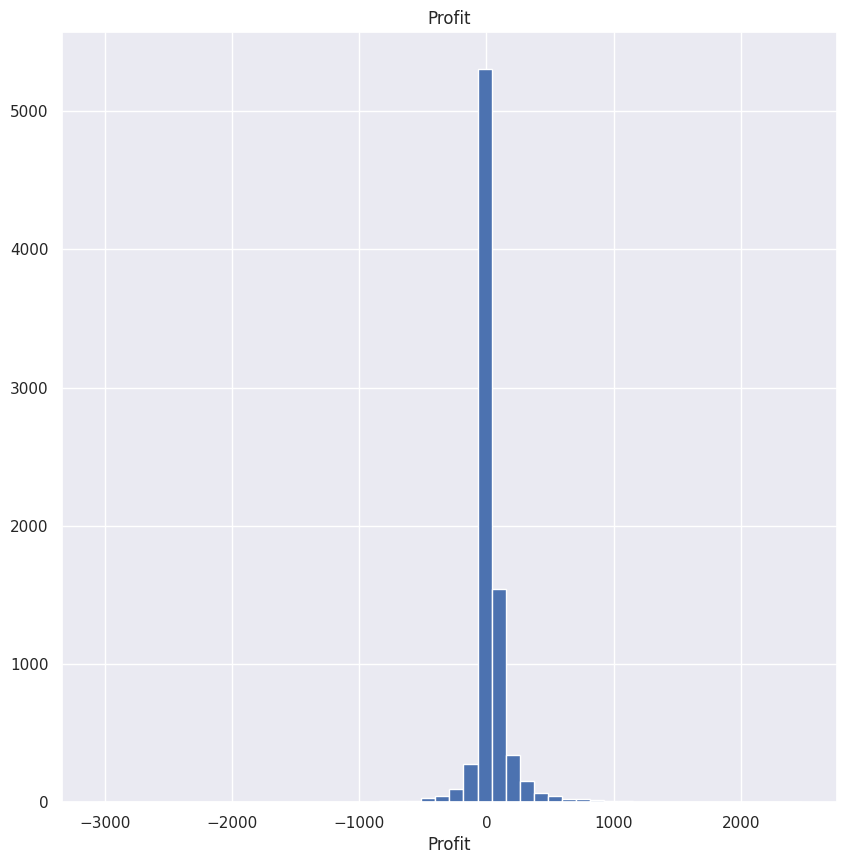

#####################################
count   8047.00000
mean       3.77209
std        2.20337
min        1.00000
5%         1.00000
10%        2.00000
20%        2.00000
30%        2.00000
40%        3.00000
50%        3.00000
60%        4.00000
70%        5.00000
80%        5.00000
90%        7.00000
95%        8.00000
99%       11.00000
max       14.00000
Name: Quantity, dtype: float64


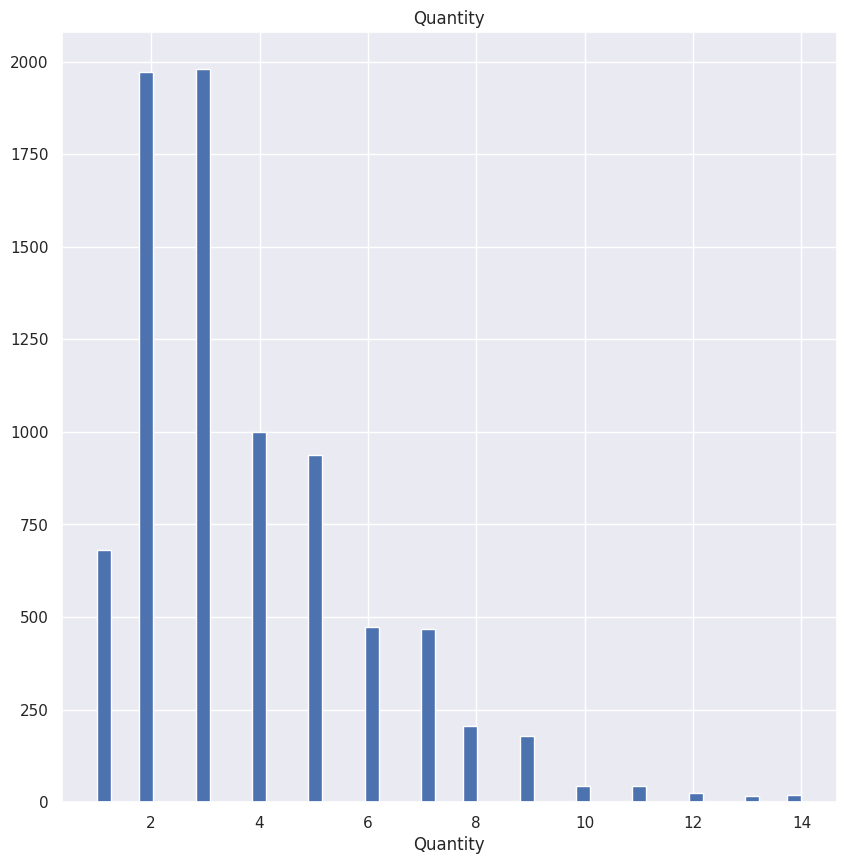

#####################################
count    8047.00000
mean     1478.68560
std      3725.80943
min         3.00000
5%         28.00000
10%        50.00000
20%       102.00000
30%       170.80000
40%       249.00000
50%       413.00000
60%       592.00000
70%       990.00000
80%      1688.00000
90%      3561.60000
95%      6297.90000
99%     17068.96000
max     80206.00000
Name: TotalPrice, dtype: float64


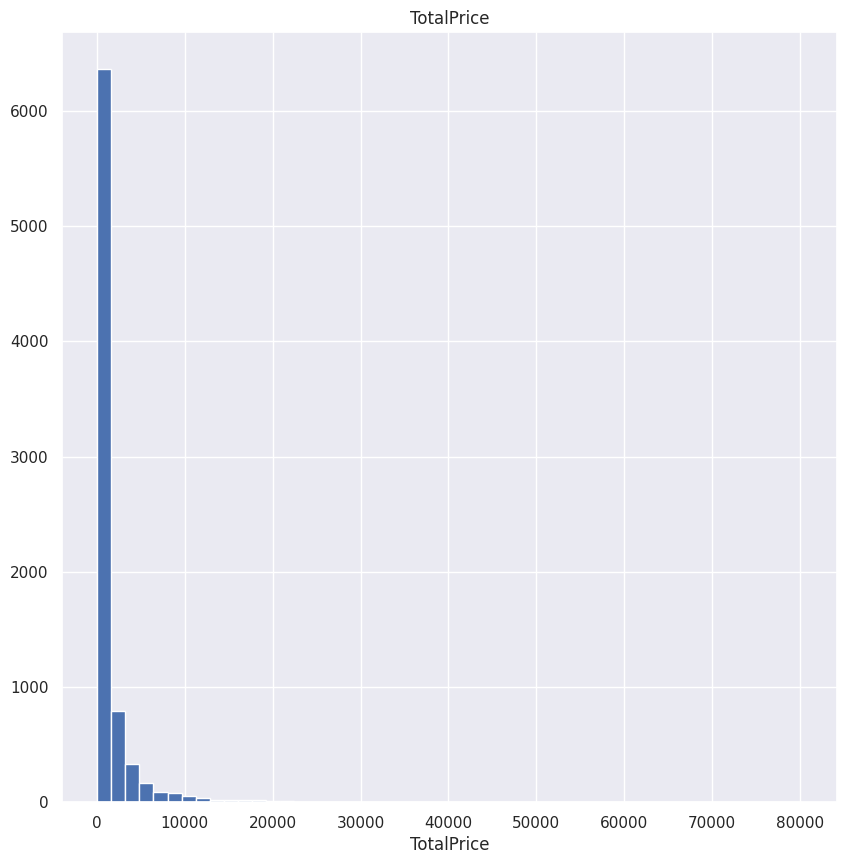

#####################################


In [142]:
for col in num_cols:
  num_summary(df, col ,plot=True)

In [143]:
def target_summary_with_cat(dataframe,cat_col,target):
  print(pd.DataFrame({"Target_Mean":df.groupby(cat_col)["TotalPrice"].mean(),
                      "Ratio": (dataframe.groupby(cat_col)[target].sum() / dataframe.groupby(cat_cols)[target].sum().sum()) * 100}),end="\n\n\n")

In [144]:
for col in cat_cols:
  target_summary_with_cat(df,col,"TotalPrice")

                Target_Mean    Ratio
Country                             
Austria          1483.68939  3.29183
Belgium          1702.43704  1.93150
Denmark           576.95000  0.29092
Finland          1281.26562  0.68914
France           1622.43841 26.12485
Germany          1470.41646 20.26630
Ireland           757.24000  0.63639
Italy            1203.18795  9.89934
Netherlands       966.19338  3.19115
Norway           1426.82857  0.83938
Portugal         1351.84286  0.79527
Spain            1761.93430 11.26846
Sweden            829.85714  1.41576
Switzerland      1816.16667  1.19053
United Kingdom   1645.31735 18.16917


         Target_Mean    Ratio
Region                       
Central   1505.41640 55.99616
North     1448.16565 22.04077
South     1443.85746 21.96307


             Target_Mean    Ratio
Segment                          
Consumer      1477.15621 51.81661
Corporate     1543.39181 32.60856
Home Office   1363.68359 15.57483


              Target_Mean    Ratio
Ship Mode 

<ipython-input-147-632f0d84eb76>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))


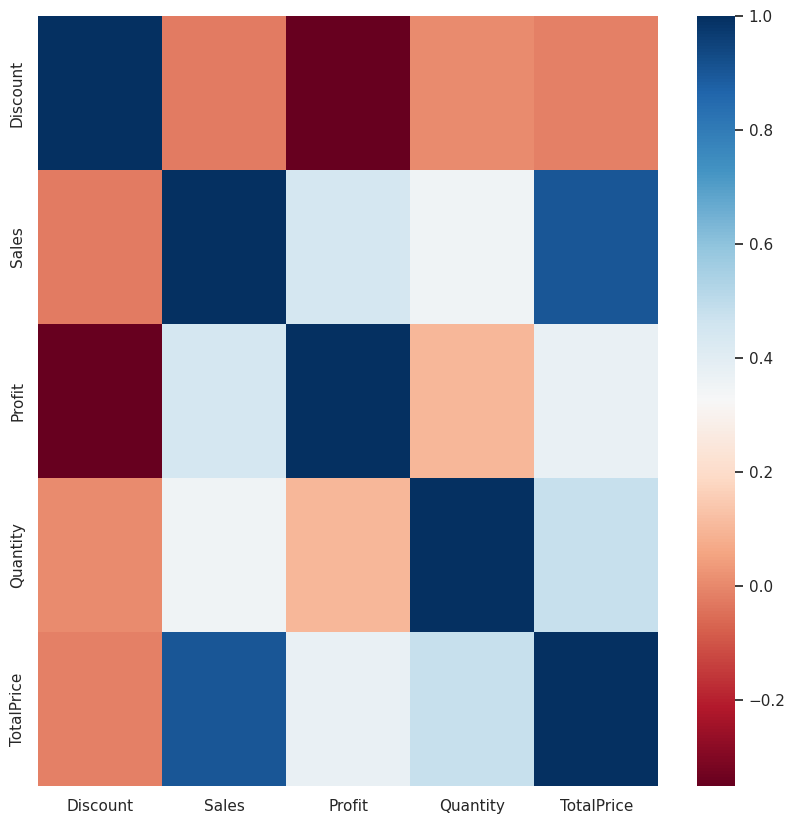

['TotalPrice']

In [147]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (10,10)})
        sns.heatmap(corr, cmap="RdBu")
        plt.show()
    return drop_list
high_correlated_cols(df, plot=True)

In [148]:
# Outlier Threshold

def outlier_thresholds(dataframe, variable, low_quantile=0.10, up_quantile=0.90):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [149]:
# Check outlier

def check_outlier(dataframe, col_name):
  low, up = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] < low) | (dataframe[col_name] > up)].any(axis=None):
    return True
  else :
    return False


In [150]:
for col in num_cols:
  if col != "TotalPrice":
    print(col,check_outlier(df,col))

Discount False
Sales True
Profit True
Quantity False


In [151]:
# # Suppression of outliers

def replace_with_thresholds(dataframe, col_name):
  low, up = outlier_thresholds(dataframe,col_name)
  dataframe.loc[(dataframe[col_name] < low), col_name] = low
  dataframe.loc[(dataframe[col_name] > up),   col_name] = up

In [152]:
for col in num_cols:
  if col != "TotalPrice":
    replace_with_thresholds(df, col)

In [153]:
for col in num_cols:
  if col != "TotalPrice":
    print(col,check_outlier(df,col))

Discount False
Sales False
Profit False
Quantity False


In [154]:
# Perform rare analysis and apply rare encoder.

def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")


In [156]:
rare_analyser(df, "TotalPrice", cat_cols)

Country : 15
                COUNT   RATIO  TARGET_MEAN
Austria           264 0.03281   1483.68939
Belgium           135 0.01678   1702.43704
Denmark            60 0.00746    576.95000
Finland            64 0.00795   1281.26562
France           1916 0.23810   1622.43841
Germany          1640 0.20380   1470.41646
Ireland           100 0.01243    757.24000
Italy             979 0.12166   1203.18795
Netherlands       393 0.04884    966.19338
Norway             70 0.00870   1426.82857
Portugal           70 0.00870   1351.84286
Spain             761 0.09457   1761.93430
Sweden            203 0.02523    829.85714
Switzerland        78 0.00969   1816.16667
United Kingdom   1314 0.16329   1645.31735


Region : 3
         COUNT   RATIO  TARGET_MEAN
Central   4426 0.55002   1505.41640
North     1811 0.22505   1448.16565
South     1810 0.22493   1443.85746


Segment : 3
             COUNT   RATIO  TARGET_MEAN
Consumer      4174 0.51870   1477.15621
Corporate     2514 0.31241   1543.39181
Home Off

In [159]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


In [176]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import RobustScaler


In [164]:
df.head()

,Order ID,Order Date,Customer Name,City,Country,Region,Segment,Ship Date,Ship Mode,State,Product Name,Discount,Sales,Profit,Quantity,Category,Sub-Category,TotalPrice
0,BN-2011-7407039,2011-01-01,Ruby Patel,Stockholm,Sweden,North,Home Office,2011-01-05,Economy Plus,Stockholm,"Enermax Note Cards, Premium",0.50000,45.00000,-26.00000,3.00000,Office Supplies,Paper,135
1,AZ-2011-9050313,2011-01-03,Summer Hayward,Southport,United Kingdom,North,Consumer,2011-01-07,Economy,England,"Dania Corner Shelving, Traditional",0.00000,854.00000,290.00000,7.00000,Furniture,Bookcases,5978
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,Valence,France,Central,Consumer,2011-01-08,Economy,Auvergne-Rhône-Alpes,"Binney & Smith Sketch Pad, Easy-Erase",0.00000,140.00000,21.00000,3.00000,Office Supplies,Art,420
3,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Boston Markers, Easy-Erase",0.50000,27.00000,-22.00000,2.00000,Office Supplies,Art,54
4,BN-2011-2819714,2011-01-04,Mary Parker,Birmingham,United Kingdom,North,Corporate,2011-01-09,Economy,England,"Eldon Folders, Single Width",0.50000,17.00000,-1.00000,2.00000,Office Supplies,Storage,34


In [167]:
drop_list = ["Order Date", "Order ID", "Customer Name", "Ship Date","State","Product Name","City"]

In [168]:
for col in df.columns:
  if col not in drop_list:
    print(col,df[col].nunique())

Country 15
Region 3
Segment 3
Ship Mode 4
Discount 14
Sales 1095
Profit 572
Quantity 14
Category 3
Sub-Category 17
TotalPrice 2206


In [169]:
df.drop(drop_list,axis=1,inplace=True)

In [173]:
# Label Encoding & One-Hot Encoding
# There is no two-class variable here.


def label_encoder(dataframe,binary_col):
  le = LabelEncoder()
  dataframe[binary_col] = le.fit_transform(dataframe[binary_col])


binary_col = [col for col in df.columns if (df[col].dtype == "O") and (df[col].nunique() == 2)]


for col in binary_col:
  label_encoder(df, col)

In [174]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [175]:
df.head()

,Discount,Sales,Profit,Quantity,TotalPrice,Country_Belgium,Country_Denmark,Country_Finland,Country_France,Country_Germany,Country_Ireland,Country_Italy,Country_Netherlands,Country_Norway,Country_Portugal,Country_Spain,Country_Sweden,Country_Switzerland,Country_United Kingdom,Region_North,Region_South,Segment_Corporate,Segment_Home Office,Ship Mode_Economy Plus,Ship Mode_Immediate,Ship Mode_Priority,Category_Office Supplies,Category_Technology,Sub-Category_Appliances,Sub-Category_Art,Sub-Category_Binders,Sub-Category_Bookcases,Sub-Category_Chairs,Sub-Category_Copiers,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
0,0.50000,45.00000,-26.00000,3.00000,135,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.00000,854.00000,290.00000,7.00000,5978,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.00000,140.00000,21.00000,3.00000,420,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.50000,27.00000,-22.00000,2.00000,54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.50000,17.00000,-1.00000,2.00000,34,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [177]:
df_ = df.copy()

In [180]:
def scale(dataframe,num_cols):
  sc = RobustScaler()
  dataframe[num_cols] = sc.fit_transform(dataframe[num_cols])
  return dataframe

df = scale(df,num_cols)

In [182]:
!pip install lazypredict

In [186]:
X = df.drop("TotalPrice",axis=1)
y = df["TotalPrice"]

In [187]:
from lazypredict.Supervised import  LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=17)


clf = LazyRegressor(predictions=True)
models = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:56<00:00,  1.33s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 6035, number of used features: 43
[LightGBM] [Info] Start training from score 0.919227
(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GradientBoostingRegressor                    0.92       0.92  0.95        1.08
XGBRegressor                                 0.91       0.91  0.98        0.32
RandomForestRegressor                        0.91       0.91  1.00        4.87
DecisionTreeRegressor                        0.91       0.91  1.02        0.08
BaggingRegressor                             0.90       0.90  1.03        0.46
LGBMRegressor                             